# Exploratory analysis 



## Libraries

In [3485]:
#Exploratory analysis and data preprocessing
import pandas as pd
import numpy as np


#Graphics
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Clusterin
from sklearn.cluster import KMeans

#Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

#Model Selection
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

#PC Performance
import multiprocessing
import warnings
warnings.filterwarnings("ignore")

## Functions

In [3486]:
#Plotting the ROC Curve
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

## Data

In [3487]:
data = pd.read_csv('/Users/user/Desktop/Sandsoft_test/Business Data Scientist - Test/mobile_game_subscriptions.csv')
data.head()

,customer_id,gender,vip_status,guild_member,referrals,tenure_months,chat_activated,custom_avatar,subscription_type,2FA,...,disconnection_protection,premium_support,quick_charge,extra_stamina,subscription_type.1,email_billing,payment_method,monthly_charges_usd,total_charges_usd,opt_out
0,957e0bbf-d3a7-4053-828c-ab88faad57c8,Female,0,Yes,No,1,No,No,Advanced,No,...,No,No,No,No,Monthly,Yes,Skrill,29.85,29.85,No
1,791ddcbe-4134-4f8e-84b6-b633fb56827a,Male,0,No,No,34,Yes,Simple,Advanced,Yes,...,Yes,No,No,No,Yearly,No,PayPal,56.95,1889.5,No
2,bee89365-8e23-4bac-96d6-4894dd331263,Male,0,No,No,2,Yes,Simple,Advanced,Yes,...,No,No,No,No,Monthly,Yes,PayPal,53.85,108.15,Yes
3,c6aae754-2f39-470c-9aef-36d3622f996f,Male,0,No,No,45,No,No,Advanced,Yes,...,Yes,Yes,No,No,Yearly,No,Bank,42.30,1840.75,No
4,0c319e7e-4752-496e-8e38-5adff5592d38,Female,0,No,No,2,Yes,Simple,Pro,No,...,No,No,No,No,Monthly,Yes,Skrill,70.70,151.65,Yes


In [3488]:
data.shape

(7043, 21)

The dataset has 21 columns and 7043 registers, and contains data information about a videogame.

The columns are classified as follows:
- Services that each user has signed up for (chat_activated, custom_avatar, subscription_type, 2FA, auto_save, disconnection_protection, premium_support, quick_charge, extra_stamina).
- User account information (subscription_type, email_billing, payment_method, monthly_charges_usd, total_charges_usd).
- Users who left within the last month (opt_out).

Is necessary to verify if the data type of the columns were set correctly 

In [3489]:
data.dtypes

customer_id                  object
gender                       object
vip_status                    int64
guild_member                 object
referrals                    object
tenure_months                 int64
chat_activated               object
custom_avatar                object
subscription_type            object
2FA                          object
auto_save                    object
disconnection_protection     object
premium_support              object
quick_charge                 object
extra_stamina                object
subscription_type.1          object
email_billing                object
payment_method               object
monthly_charges_usd         float64
total_charges_usd            object
opt_out                      object
dtype: object

It can be seen that the 'total_charges_usd' column was not assigned as a numeric type variable. For this reason, it will be analyzed if the column has non-numeric values in it.

In [3490]:
data.total_charges_usd.sort_values().head(15)

print(f"The column total_charges_usd has {(data['total_charges_usd'] == ' ').sum(): 1.0f}" + ' blank records')

The column total_charges_usd has  11 blank records


These records will be converted to null, in the first instance, and the column will be converted to a numeric

In [3491]:
data['total_charges_usd'] = np.where(data['total_charges_usd'] == " ",None,data.total_charges_usd)

data['total_charges_usd'] = data.total_charges_usd.astype('float')

We have a total of 7043 records where each one refers to a customer_id. So it would be important to check if all records were assigned a customer id. 

As can be seen, each customer_id is made up of 36 characters, so it will be verified if there is any record with fewer characters.

In [3492]:
print(f'There are {(data.customer_id.apply(lambda x: len(x))<36).sum(): 0.0f} registers that were assigned incorrectly ')

There are  5 registers that were assigned incorrectly 


In [3493]:
data.customer_id[data.customer_id.apply(lambda x: len(x))<36]

1221    #NUM!
1776    #NUM!
2105    #NUM!
2391    #NUM!
2699    #NUM!
Name: customer_id, dtype: object

There are 5 records that do not match the customer number which will be changed to another random name, since it is not considered an important column for the requested work

In [3494]:
na_index = data.customer_id[data.customer_id.apply(lambda x: len(x))<36].index

for i in na_index:
    data.customer_id.loc[i] = 'Customer-'+str(i)
    
    
data.customer_id[data.customer_id.apply(lambda x: len(x))<36]

1221    Customer-1221
1776    Customer-1776
2105    Customer-2105
2391    Customer-2391
2699    Customer-2699
Name: customer_id, dtype: object

Is important also, to check if there are any missing value in the dataset (in addition to the registers previously converted to null. 

In [3495]:
data.isnull().sum()

customer_id                    0
gender                         0
vip_status                     0
guild_member                   0
referrals                      0
tenure_months                  0
chat_activated                 0
custom_avatar                  0
subscription_type              0
2FA                         1526
auto_save                   1526
disconnection_protection    1526
premium_support             1526
quick_charge                1526
extra_stamina               1526
subscription_type.1            0
email_billing                  0
payment_method                 0
monthly_charges_usd            0
total_charges_usd             11
opt_out                        0
dtype: int64

As the previous code shows, 1526 missing values are observed in 6 columns that refer to the services subscribed by each user. The null values will be imputed later

We can also check the rest of the columns to see if any of the object type columns have blank values.

In [3496]:
(data == " ").sum()>0

customer_id                 False
gender                      False
vip_status                  False
guild_member                False
referrals                   False
tenure_months               False
chat_activated              False
custom_avatar               False
subscription_type           False
2FA                         False
auto_save                   False
disconnection_protection    False
premium_support             False
quick_charge                False
extra_stamina               False
subscription_type.1         False
email_billing               False
payment_method              False
monthly_charges_usd         False
total_charges_usd           False
opt_out                     False
dtype: bool

There are no any blank value.

Let's proceed with the numeric columns:
- tenure_months
-monthly_charges_usd
-total_charges_usd

Because they have numeric data types, they could have outliers within them.

<AxesSubplot:>

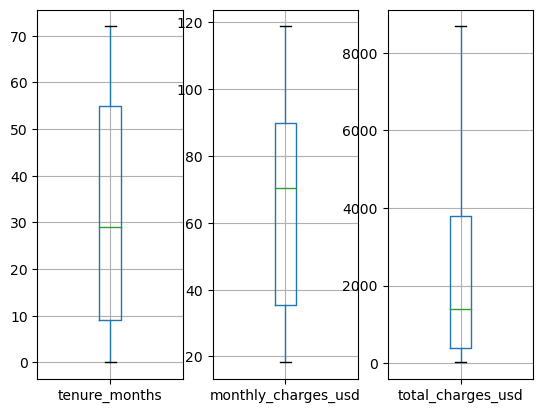

<Figure size 600x400 with 0 Axes>

In [3497]:
figure,axis = plt.subplots(nrows = 1, ncols = 3)
figure = plt.figure(figsize=(6,4))

data[['tenure_months']].boxplot(ax=axis[0])
data[['monthly_charges_usd']].boxplot(ax=axis[1])
data[['total_charges_usd']].boxplot(ax=axis[2])


None of them presents any outlier. 

For more information, check also if there is any relationship with player behavior by plotting their distribution.

Since total_charges_usd is a combination of monthly_charges_usd and tenure_monts, only the last two will be analyzed

Text(11.702156249999996, 0.5, 'Frequency')

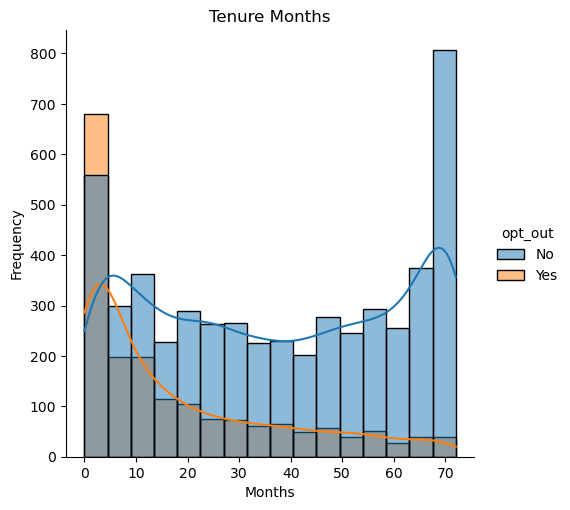

In [3499]:
sb.displot(data = data, x = 'tenure_months',kind = 'hist',kde=True,hue = 'opt_out')
plt.title("Tenure Months")
plt.xlabel("Months")
plt.ylabel("Frequency")

The last graph shows two peaks at its ends, which indicates that the video game has a large number of new subscribers and loyal customers who have stayed for more than 60 months.
It can also be seen that the greatest amount of churn players occurs in the first months, which decreases rapidly for customers with greater permanence.

We can also observe that the relationship between players who leave and those who remain is very similar in the first months and then this relationship moves away as customers stay longer.

In the following command the tenure will be segmented into 4 clusters and the behavior of the clients will be observed. The clusters are:

    - Less than 6 months of tenure
    - Between 6 and 12 months of tenure
    - Between 1 and 2 years of tenure
    - More than 2 years of tenure


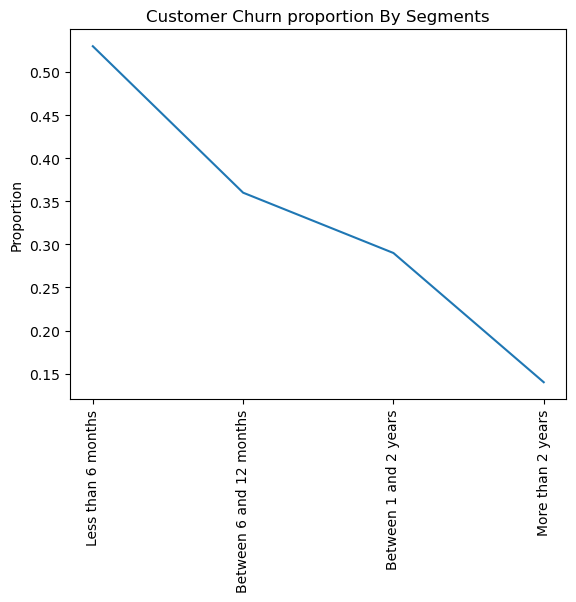

In [3500]:
seg = pd.cut(x = data.tenure_months,
                    bins = [0,6,12,24,78], 
                    labels = ['Less than 6 months', 'Between 6 and 12 months', 'Between 1 and 2 years','More than 2 years'])


tenure_seg = pd.DataFrame({'seg' : seg,'opt_out': data.opt_out})




def prop(cluster):

    return(round(((tenure_seg.seg==cluster) & (tenure_seg.opt_out == "Yes")).sum()/(tenure_seg.seg==cluster).sum(),2))
    
prop = [prop('Less than 6 months'),
prop('Between 6 and 12 months'),
prop('Between 1 and 2 years'),
prop('More than 2 years')]

prop_seg = pd.DataFrame({'seg':['Less than 6 months', 'Between 6 and 12 months', 'Between 1 and 2 years','More than 2 years'],'prop': prop})

plt.plot(prop_seg.seg,prop_seg.prop) 
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.title("Customer Churn proportion By Segments") 
plt.show()  


In the previous graph we can observe a fall in the proportion of the exit of clients as they remain subscribed to the video game for a longer time.

Another important column is monthly charges.

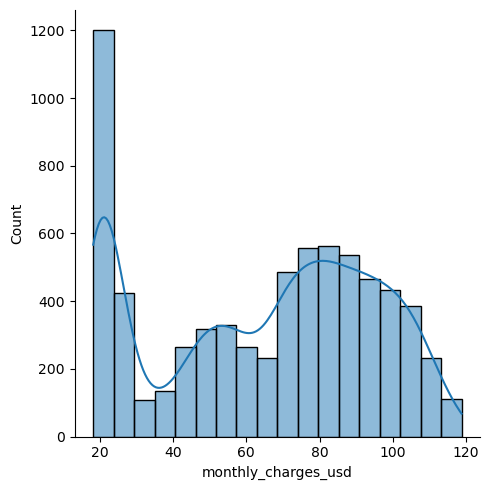

In [3501]:
sb.displot(data.monthly_charges_usd,kde=True)

As can be seen, the largest number of players with charges is in the lower tail of the distribution.

About the services subscribed by the players, we can combine them in a single column that shows the amount of services for each user and see how is it's distribution. Since this new column has null values, they will be removed for the graphic

Text(11.702156249999996, 0.5, 'Frequency')

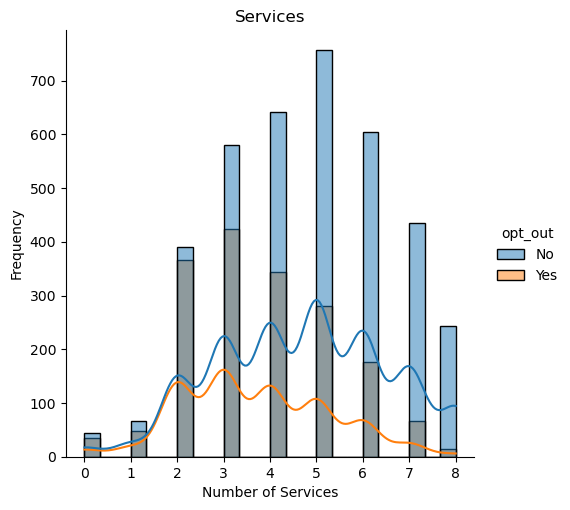

In [3502]:
data.custom_avatar = np.where(data.custom_avatar =='No','No',"Yes")
services = ['chat_activated', 'custom_avatar', '2FA', 'auto_save', 'disconnection_protection', 'premium_support', 'quick_charge', 'extra_stamina']

n_services = pd.DataFrame({'number_services': (data[services] == 'Yes').apply('sum',1)})


sb.displot(data = n_services.join(data.opt_out)[data.auto_save.isna() == False], x = 'number_services',kind = 'hist',kde=True,hue = 'opt_out')
plt.title("Services")
plt.xlabel("Number of Services")
plt.ylabel("Frequency")


The distribution is very similar to a normal distribution, where clients are mostly subscribed to 5 services. In addition, it can be seen that the clients have at least 2 services.

On the other hand, we can observe that there is a higher proportion of exits from clients who have up to 3 contracted services. This trend decreases for players with 4 services or more

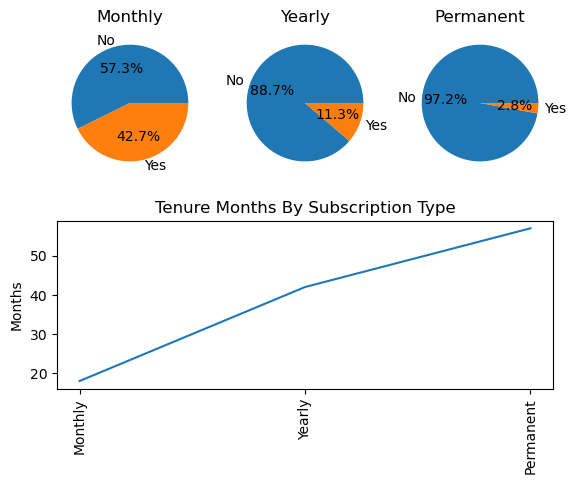

In [3505]:
#Monthly Subscription
ax1 = plt.subplot2grid((2,3),(0,0))
x = data.opt_out[data['subscription_type.1'] == 'Monthly'].value_counts()
plt.pie(x,labels =x.index,autopct='%1.1f%%')
plt.title('Monthly')

#Yearly  Subscription
ax2 = plt.subplot2grid((2, 3), (0, 1))
x = data.opt_out[data['subscription_type.1'] == 'Yearly'].value_counts()
plt.pie(x,labels =x.index,autopct='%1.1f%%')
plt.title('Yearly')

#Permanent  Subscription
ax3 = plt.subplot2grid((2, 3), (0, 2))
x = data.opt_out[data['subscription_type.1'] == 'Permanent'].value_counts()
plt.pie(x,labels =x.index,autopct='%1.1f%%')
plt.title('Permanent')


ax4 = plt.subplot2grid((2, 3), (1, 0),colspan=3)
x = data.groupby('subscription_type.1').mean().round()[['tenure_months']].sort_values(by = 'tenure_months') 

plt.plot(x.index,x.values) 
plt.ylabel("Months")
plt.xticks(rotation=90)
plt.title("Tenure Months By Subscription Type") 
plt.show()


Players who subscribe monthly have a higher exit rate, where almost half of the them under this type of subscription remain. The exit rate for annual and permanent subscriptions decreases.

In addition, the average tenure is much lower for those who subscribe monthly, where the average is 18 months. As for annual and permanent subscribers, the average is 42 and 57 months, respectively.

Text(0.5, 1.0, 'Female')

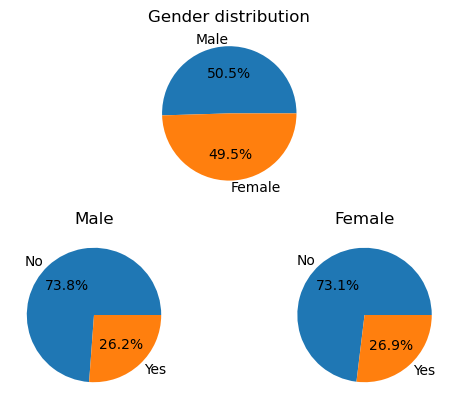

In [3506]:
ax1 = plt.subplot2grid((2, 2), (0, 0),colspan=2)
plt.pie(data.gender.value_counts().values,labels =data.gender.value_counts().index,autopct='%1.1f%%')
plt.title('Gender distribution')

ax2 = plt.subplot2grid((2, 2), (1, 0))
x = data.opt_out[data['gender'] == 'Male'].value_counts()
plt.pie(x,labels =x.index,autopct='%1.1f%%')
plt.title('Male')

ax2 = plt.subplot2grid((2, 2), (1, 1))
x = data.opt_out[data['gender'] == 'Female'].value_counts()
plt.pie(x,labels =x.index,autopct='%1.1f%%')
plt.title('Female')



As for the distribution by gender, there is almost the same number of male as women. In addition, if we observe the proportion of churn players, it is similar in both male and female.

The churn rate is  27%


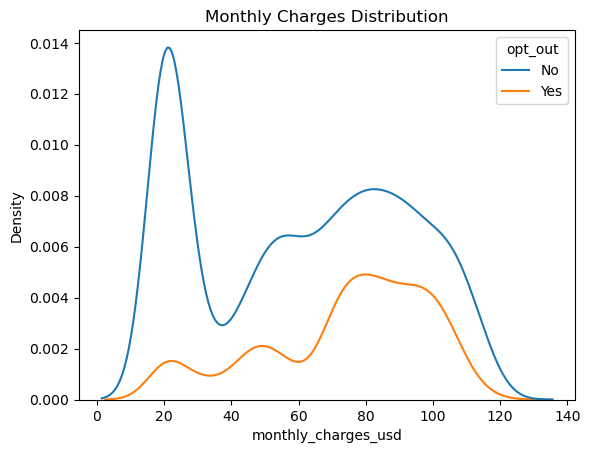

In [3507]:
sb.kdeplot(data=data[['monthly_charges_usd','opt_out']], x='monthly_charges_usd', hue='opt_out')
plt.title('Monthly Charges Distribution')

churn_rate = ((data.opt_out == 'Yes').sum()/len(data)).round(2)
print(f'The churn rate is { churn_rate*100: 0.0f}' + '%')

The graph shows the monthly charge density for players who left and for those who remained. The density curve of those who left is lower because they represent 27% of the total number of players, showing that there is an imbalance of classes in this column.

As for the average charges, the greatest difference in frequencies occurs in values around 20%, where customers are more likely to stay. As the charges increase, the relationship between the two remains similar.

# Player Segments

To carry out the segmentation of players, the columns of monthly charges, the number of contracted services and the tenure will be taken, and the cluster selection method will be the kmean. In the first place, the number of clusters (k) that best separates the data will be selected in order to analyze the behavior of the players.

The k will be determined by comparing the mean distance of the data to the cluster centroid for a range of 1 to 20 values of k.

In the first place, a dataframe called 'segments' will be created, which will be made up of the selected columns and then a graph will be made that shows the average distance of the data from the cluster. The number of k selected will be the one from which the average distance decreases at a lower rate

Text(0.5, 0, 'K')

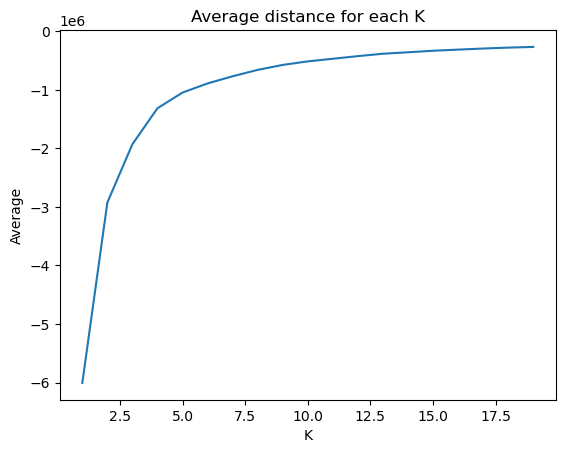

In [3508]:
mask = data[services].isna().apply('sum',1) ==0

services_df =pd.DataFrame({'number_services':(data[services].dropna() == 'Yes').apply('sum',1)})


segments = pd.merge(data[['tenure_months','monthly_charges_usd']][mask], services_df, left_index=True, right_index=True)

segments = pd.DataFrame({'tenure_months' :data.tenure_months[mask],
                         'monthly_charges_usd':data.monthly_charges_usd[mask],
                         'number_services':services_df['number_services']})

number_cluster = range(1,20)
score = []
for i in number_cluster:
    
    score.append(round(KMeans(n_clusters=i).fit(segments).score(segments)))

    
plt.plot(number_cluster,score)
plt.title('Average distance for each K')
plt.ylabel('Average')
plt.xlabel('K')


It can be seen that from k=3 , the average distance begins to decrease as more clusters are added. In this way 3 clusters will be taken

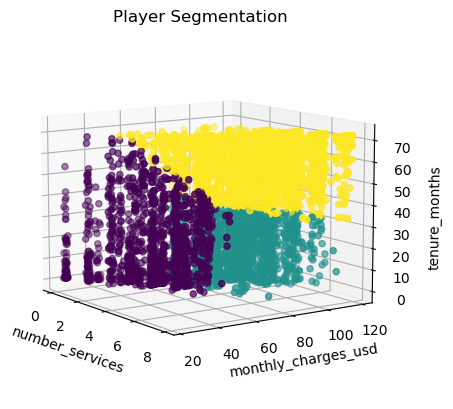

,tenure_months,monthly_charges_usd,number_services
n_clusters,,,
0,19.0,48.0,3.0
1,14.0,84.0,4.0
2,59.0,89.0,6.0


In [3509]:
cluster = pd.DataFrame(KMeans(n_clusters=3).fit(segments).predict(segments))
cluster.index = segments.index
cluster.columns = ['n_clusters']

segments = segments.join(cluster)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.title('Player Segmentation')
ax.scatter(segments.number_services,
            segments.monthly_charges_usd,
            segments.tenure_months,
            c=segments.n_clusters, marker='o')


ax.set_xlabel('number_services')
ax.set_ylabel('monthly_charges_usd')
ax.set_zlabel('tenure_months')
ax.view_init(10, -35) 
plt.show()

segments.groupby('n_clusters').mean().round()

The graphic shows 3 zones visibly separated from each other.

To better understand the player behaviour, the relationship of each feature with the others can be analyzed.

Text(0, 0.5, 'Number of Services')

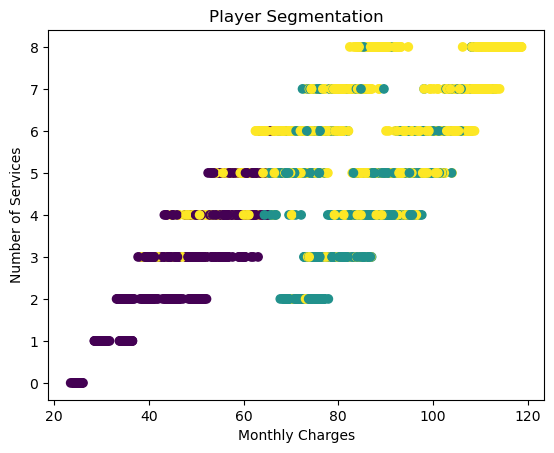

In [3510]:
plt.scatter(segments.monthly_charges_usd,
            segments.number_services,
            c=segments.n_clusters, marker='o')

plt.title('Player Segmentation')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Services')


This graph shows the relationship between the number of services and the monthly charges for each cluster. It is observed that as customers contract more services, the monthly charge increases (as expected).

As for the players, we can see that the players in the violet group subscribe to an average of 3 services and therefore the charge they pay monthly is the lowest ($48).

As for the yellow and green groups, they present a similar monthly charge, but the green group subscribes a greater number of services (6 on average vs 4)

Text(0, 0.5, 'Number of Services')

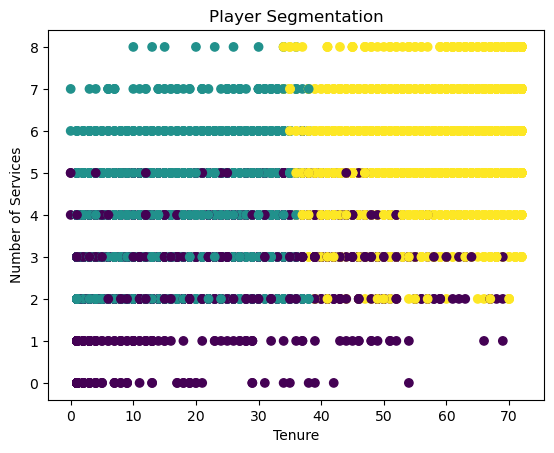

In [3512]:
plt.scatter(segments.tenure_months,
            segments.number_services,
            c=segments.n_clusters, marker='o')

plt.title('Player Segmentation')
plt.xlabel('Tenure')
plt.ylabel('Number of Services')

This graph shows the relationship between tenure and the number of services.

Another marked difference between the green and yellow groups is clearly observed, where the players in the green group stay longer than those in the yellow group (59 vs. 19 months on average, respectively).
The players of the violet group, on the other hand, have little permanence with an average of 14 months.

Text(0, 0.5, 'Tenure')

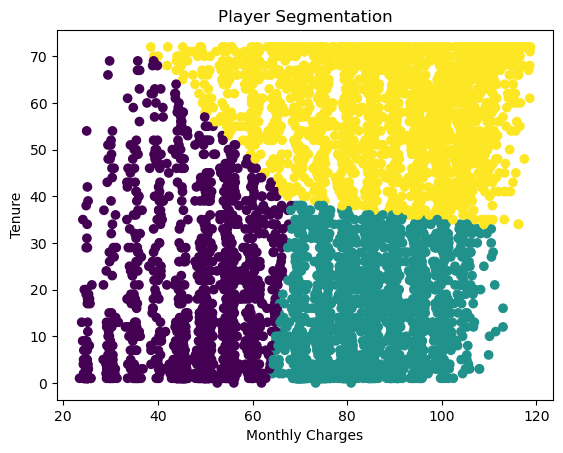

In [3513]:
plt.scatter(segments.monthly_charges_usd,
            segments.tenure_months,
            c=segments.n_clusters, marker='o')

plt.title('Player Segmentation')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')

This graph shows the relationship between monthly charges and permanence.

The 3 zones are very clear, where the green group are those players who have higher positions and also longer permanence. Those in the yellow group have a high monthly charge but with a lower permanence. And those of the violet group have low positions and their permanence is also low.

# key drivers explaining customer churn

### Null imputation

Given that services columns have null values, it is necessary to impute the values.

The columns corresponding to the services subscribed by the players are going to be grouped in a single one that will show the number of services to which each player subscribed. The problem is that 6 columns have null values, so it will be necessary to impute them.

The imputation methodology will be as follows:
- In the first place, a matrix will be created that will obtain the average charge given the number of subscribed services.
- Secondly, the monthly charge of the registry with null values will be taken and compared with the average monthly charge of the previous table.
- The imputed service number will be the number of services with the closest monthly charge to the one in the registry

The following command generates a list of the indexes of the records that have null

In [3514]:

na_index = data[services].isnull().apply('sum',1)[data[services].isnull().apply('sum',1)>0].index


Now a new column with the number of services subscribed for each record will be created and joined to the dataset. Then, the columns that correspond to services will be removed from it.

In [3515]:

for i in na_index:
    n_services.loc[i]=None

    
data = data.drop(services,axis = 1).join(n_services)

Below is a table with the average monthly charges according to the number of subscribed services

In [3516]:
mean_charges = data[['number_services','monthly_charges_usd']].groupby('number_services').mean().round(2)
mean_charges

,monthly_charges_usd
number_services,
0.0,24.90
1.0,31.33
2.0,58.26
3.0,66.36
4.0,75.42
5.0,83.78
6.0,91.46
7.0,96.94
8.0,102.70


As expected, the average monthly charge increases with the number of services subscribed.

The following code proceeds to impute the null values

In [3517]:
for i in na_index:
    data.loc[i,'number_services'] = (data.monthly_charges_usd[data.number_services.isna()].loc[i] - mean_charges).abs().sort_values(by = 'monthly_charges_usd').index[0]


For the total_charges_usd column, the nulls will be imputed by multiplying the tenure_months column by monthly_charges_usd

In [3518]:
na_index = data.total_charges_usd[data.total_charges_usd.isnull()].index

for i in na_index:   
    data.loc[i,'total_charges_usd'] = data.loc[i,'monthly_charges_usd'] * data.loc[i,'tenure_months']

The column customer_id is not needed for thhe analysis, so will be deleted from the dataset 

In [3519]:
data = data.drop('customer_id',axis = 1)

The columns that are composed of the string data type will be converted to dummy so that they can be used in the models

In [3520]:
cat_columns = [['gender','guild_member','referrals','subscription_type','subscription_type.1','email_billing','payment_method']]

data_dummy = data[data.columns[data.columns.isin(['gender','guild_member','referrals','subscription_type','subscription_type.1','email_billing','payment_method'])==False]]

for i in (cat_columns):

    dummy = pd.get_dummies(data[i])
    data_dummy = data_dummy.join(dummy)

data_dummy.opt_out = np.where(data.opt_out == 'Yes',1,0)

data_dummy

,vip_status,tenure_months,monthly_charges_usd,total_charges_usd,opt_out,number_services,gender_Female,gender_Male,guild_member_No,guild_member_Yes,...,subscription_type_Pro,subscription_type.1_Monthly,subscription_type.1_Permanent,subscription_type.1_Yearly,email_billing_No,email_billing_Yes,payment_method_Bank,payment_method_Card,payment_method_PayPal,payment_method_Skrill
0,0,1,29.85,29.85,0,1.0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1,0,34,56.95,1889.50,0,4.0,0,1,1,0,...,0,0,0,1,1,0,0,0,1,0
2,0,2,53.85,108.15,1,4.0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,45,42.30,1840.75,0,3.0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0,2,70.70,151.65,1,2.0,1,0,1,0,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,7.0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,6.0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1.0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
7041,1,4,74.40,306.60,1,2.0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


As mentioned during the exploratory analysis, the opt_out column has unbalanced classes. To prevent the model from having a performance in the minority class, an upsumpling technique is applied so that the classes are equal.

In [3524]:

oversample = SMOTE()

X,y = oversample.fit_resample(X = data_dummy[data_dummy.columns[data_dummy.columns.isin(['opt_out'])==False]],y=data_dummy['opt_out'])

data_upsampled = X.assign(opt_out = y)

X = data_upsampled[data_upsampled.columns[data_upsampled.columns.isin(['opt_out'])==False]]
y = data_upsampled['opt_out']

The values of the predictor columns will be normalized since they are in different scales

In [3525]:

scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_scale.index = X.index
X_scale.columns = X.columns


In order to evaluate the models, the base will be divided into testing and training.

In [3526]:

X_train, X_test, y_train, y_test = train_test_split(X_scale,y,test_size= 0.2, random_state = 10)


# Models

The models to be implemented will be Logistic Regression, Random Forest and GBM.

The metric to buy the models would be the f1 metric since accuracy and completeness are considered equally important.

We need the model to explain the reasons why players leave, for this reason we need a good recall so that the model identifies the largest number of players who leave, and also that the model does not consider players who leave when in fact they will stay.

The AUC metric will also be used to identify how well the model separates the classes.


## Logistic Regression

The first model to be implemented will be a logistic regression. Due to the interpretability of its coefficients, it is possible to obtain information about customer churn.


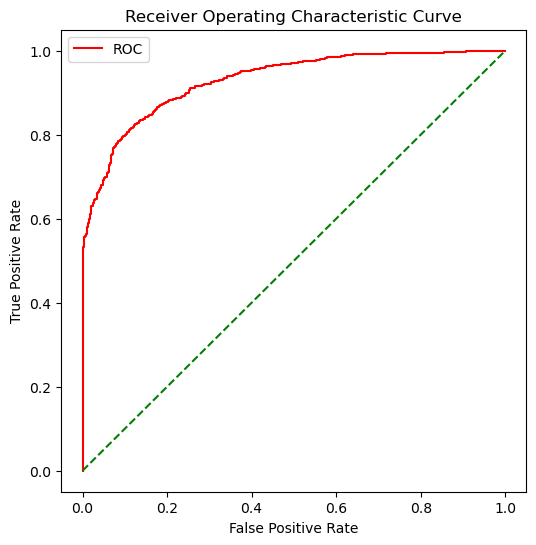

The AUC metric for the Logistic Regression Model is  85%
The f1 score for the training set is  85%
The f1 score for the test set is  84%


In [3532]:

logistic_model = LogisticRegression(max_iter = 250,
                                    fit_intercept = False,
                                    random_state = 1234)

logistic_scores = cross_val_score(logistic_model,
                                  X_train,y_train,
                                  cv = 10,
                                  scoring = 'f1').mean().round(2)

logistic_model = logistic_model.fit(X_train,y_train)


plt.figure(figsize=(6,6))
prob = logistic_model.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)


print(f'The AUC metric for the Logistic Regression Model is {round(roc_auc_score(y_test,logistic_model.predict(X_test)),3)*100: 0.0f}%')
print(f'The f1 score for the training set is {logistic_scores*100: 0.0f}%')
print(f'The f1 score for the test set is {f1_score(y_test,logistic_model.predict(X_test)).round(2)*100: 0.0f}%')


As we can see, the logistic regression model gives us a very similar f1_score in the training set as in the testing set, with 84 and 85% respectively.

Text(0, 0.5, 'Coef')

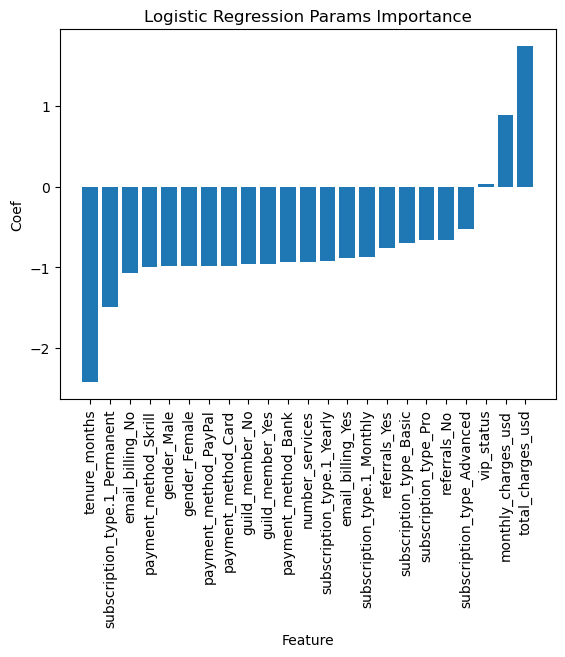

In [3528]:
logistic_params = pd.DataFrame({'Features':logistic_model.feature_names_in_,'Params':logistic_model.coef_[0]}).sort_values(by = 'Params')

plt.xticks(rotation=90)
plt.bar(logistic_params.Features,logistic_params.Params)                                                                                                                             
plt.title('Logistic Regression Params Importance')
plt.xlabel('Feature')
plt.ylabel('Coef')

                                                                                                                       

What the graph shows us is the impact that each variable has with the probability of occurrence of churn players. The negative coefficients imply that, as the associated variable grows, the probability of occurrence of churn players decreases. The magnitude of the impact that each of them has on the probability of occurrence of churn players depends on the value associated with the coefficient. Those with more negative coefficients will imply a greater reduction in the probability of occurrence. In this sense, the variables tenure, email billing and permanent subscription are the most important variables to explain the permanence of players.

For variables with a coefficient, the opposite occurs. For this reason, as the monthly and total charges increase, the probability of churn players is greater.

## Random Forest

Another model that we are going to use is the random forest that will help reduce the variance of the model.

Different values will be taken for each of the parameters, to find the best combination of them. To avoid overfitting, we will analyze the impact that each parameter has on the f1 metric in the training and testing set.

But before we start, we are going to return the X_train and X_test sets to their original scale, since the following models do not require the data to be standardized and could give us more information

In [3529]:
X_train_rev = pd.DataFrame(scaler.inverse_transform(X_train))
X_train_rev.index = X_train.index
X_train_rev.columns = X_train.columns

X_test_rev = pd.DataFrame(scaler.inverse_transform(X_test))
X_test_rev.index = X_test.index
X_test_rev.columns = X_test.columns

### Number of trees selection:

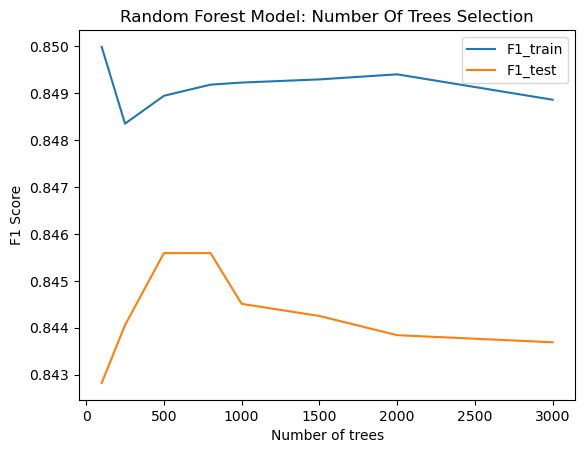

In [3530]:
randomforest_scores= pd.DataFrame(index = range(0, 4), columns=['F1_train'])
j = 0
k = [100,250,500,800,1000,1500,2000,3000]

for i in k:
    randomforest =  RandomForestClassifier(n_estimators = i,
                                           criterion='gini',
                                           n_jobs=multiprocessing.cpu_count() - 1,
                                           max_features='sqrt',
                                           min_samples_split=10,
                                           min_samples_leaf=20,
                                           bootstrap=True,
                                           random_state = 1234)

    randomforest_model_selection = cross_val_score(randomforest,
                                             X_train_rev,
                                             y_train,
                                             cv = 10,
                                             scoring = 'f1')
        
    randomforest_scores.loc[j,"Parameter"] = i
    randomforest_scores.loc[j,"F1_train"] = randomforest_model_selection.mean()
    randomforest_scores.loc[j,"F1_test"] = f1_score(y_test,randomforest.fit(X_train_rev,y_train).predict(X_test_rev))    
    
    j = j+1
    
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_train, label = "F1_train")
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_test, label = "F1_test")
plt.xlabel("Number of trees")
plt.ylabel("F1 Score")
plt.title("Random Forest Model: Number Of Trees Selection")
plt.legend()

It can be seen that the f1 metric in the training set improves slightly as the number of trees increases to 2000. But if we observe what happens in the test set, the f1 metric stabilizes when working with 500 trees, and from from there it starts to decrease, which implies overfitting.

For this reason it is selected that the number of trees is 500.

### Max number of features Selection:

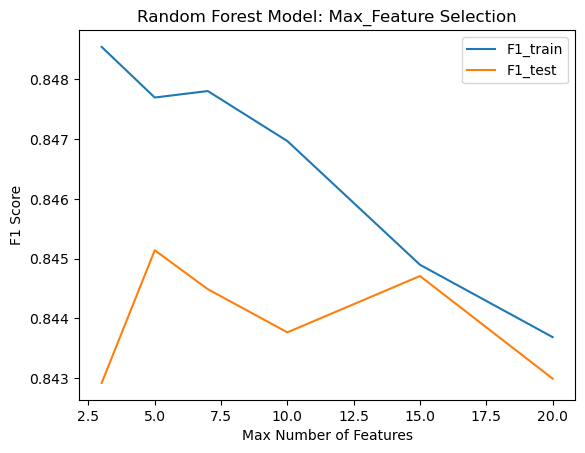

In [3531]:
randomforest_scores= pd.DataFrame(index = range(0, 6), columns=['F1_train'])
j = 0
k = [3,5,7,10,15,20]

for i in k:
    randomforest =  RandomForestClassifier(n_estimators = 500,
                                           criterion='gini',
                                           n_jobs=multiprocessing.cpu_count() - 1,
                                           max_features=i,
                                           min_samples_split=10,
                                           min_samples_leaf=20,
                                           bootstrap=True,
                                           random_state = 1234)

    randomforest_model_selection = cross_val_score(randomforest,
                                             X_train_rev,
                                             y_train,
                                             cv = 10,
                                             scoring = 'f1')
    
    
    randomforest_scores.loc[j,"Parameter"] = i
    randomforest_scores.loc[j,"F1_train"] = randomforest_model_selection.mean()
    randomforest_scores.loc[j,"F1_test"] = f1_score(y_test,randomforest.fit(X_train_rev,y_train).predict(X_test_rev))
    

    
    j = j+1
    
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_train, label = "F1_train")
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_test, label = "F1_test")
plt.xlabel("Max Number of Features")
plt.ylabel("F1 Score")
plt.title("Random Forest Model: Max_Feature Selection")
plt.legend()

For high values of the number of random features used to build the trees, the metric f1 starts to decrease for both the training and testing sets.

For this reason, we will work with 5 features.

### Max depth selection

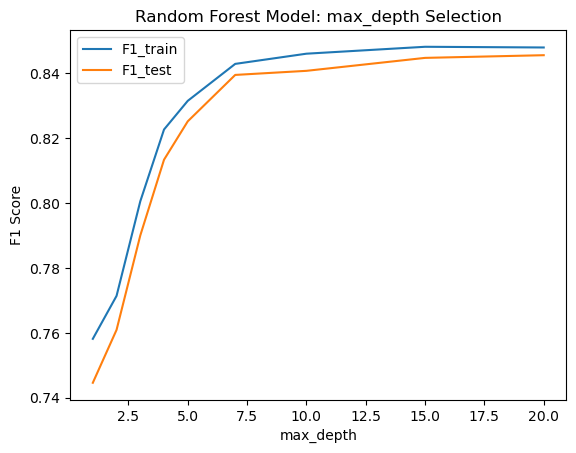

In [3201]:
randomforest_scores= pd.DataFrame(index = range(0, 4), columns=['F1_train'])
j = 0
k = [1,2,3,4,5,7,10,15,20]

for i in k:
    randomforest =  RandomForestClassifier(n_estimators = 500,
                                           criterion='gini',
                                           n_jobs=multiprocessing.cpu_count() - 1,
                                           max_features=5,
                                           max_depth=i,
                                           min_samples_split=10,
                                           min_samples_leaf=20,
                                           bootstrap=True,
                                           random_state = 1234)

    randomforest_model_selection = cross_val_score(randomforest,
                                             X_train_rev,
                                             y_train,
                                             cv = 10,
                                             scoring = 'f1')
    
    
    randomforest_scores.loc[j,"Parameter"] = i
    randomforest_scores.loc[j,"F1_train"] = randomforest_model_selection.mean()
    randomforest_scores.loc[j,"F1_test"] = f1_score(y_test,randomforest.fit(X_train_rev,y_train).predict(X_test_rev))
    

    
    j = j+1
    
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_train, label = "F1_train")
plt.plot(randomforest_scores.Parameter,randomforest_scores.F1_test, label = "F1_test")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.title("Random Forest Model: max_depth Selection")
plt.legend()

The deeper the tree, the metric improves in both sets. From a depth 7 the metric f1 begins to stabilize, so that will be the selected parameter.

We finally found the best random forest model:

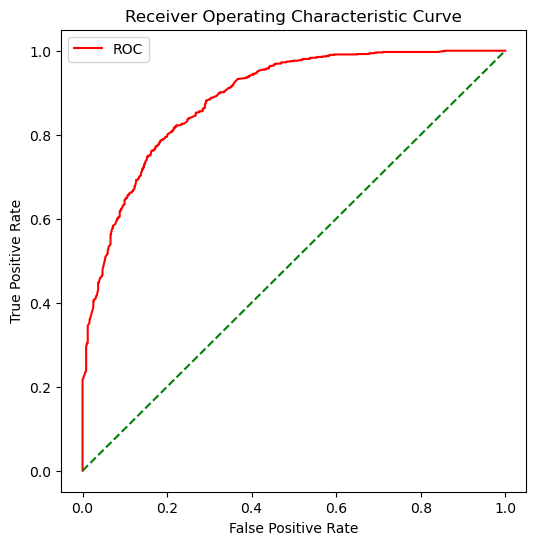

The AUC metric for the Random Forest Model is  85%
The f1 score for the train set is  87%
The f1 score for the test set is  84%


In [3228]:
randomforest_model = RandomForestClassifier(n_estimators = 500,
                       criterion='gini',
                       n_jobs=multiprocessing.cpu_count() - 1,
                       max_features=7,
                       max_depth=20,
                       min_samples_split=10,
                       min_samples_leaf=20,
                       bootstrap=True,
                       random_state = 1234).fit(X_train_rev,y_train)

plt.figure(figsize=(6,6))
prob = randomforest_model.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)


print(f'The AUC metric for the Random Forest Model is {round(roc_auc_score(y_test,randomforest_model.predict(X_test_rev)),3)*100: 0.0f}%')
print(f'The f1 score for the train set is {f1_score(y_train,randomforest_model.predict(X_train_rev)).round(2)*100: 0.0f}%')
print(f'The f1 score for the test set is {f1_score(y_test,randomforest_model.predict(X_test_rev)).round(2)*100: 0.0f}%')



The Random Forest model gives us metrics very similar to the Logistic Regression model, but with a slight improvement. Where the values of the metric f1 for the set of train and test are 87% and 84%, respectively. The AUC metric is higher, which implies that there was a better separation of classes of the variable to be predicted, where the players who remained obtained probabilities closer to 0 and the players who churn closer to 1.



Random forest model allows to represent graphicly the feature importance in the model

Text(0, 0.5, 'Feature')

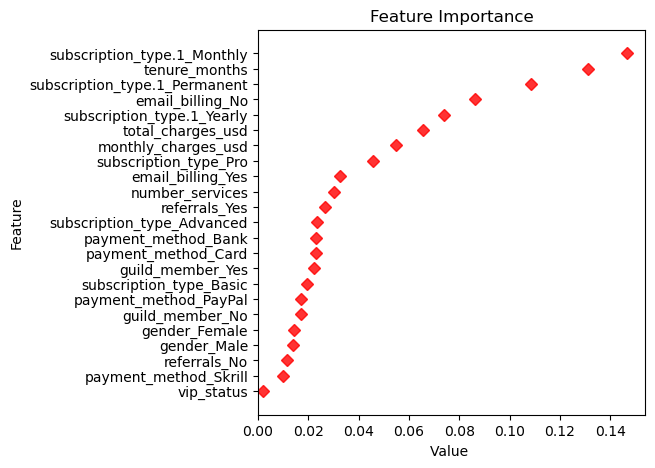

In [3215]:
random_forest_FeatImp = pd.DataFrame({'feature' : X_train.columns,
             'importance' : randomforest_model.feature_importances_}).sort_values(['importance'], ascending=True)

plt.figure(figsize = (5,5))
plt.barh(
    random_forest_FeatImp['feature'],
    random_forest_FeatImp['importance'],

    align='center',
    alpha=0
)
plt.plot(
    random_forest_FeatImp['importance'],
    random_forest_FeatImp['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)

plt.title('Feature Importance')
plt.xlabel("Value ")
plt.ylabel("Feature")

The interpretation provided by the Random Forest model is that the most influential variable in predicting player churn was the type of monthly subscription. Also, like the Logistic Regression model, the variables tenure, type of annual subscription, email billing and charges were important at the time of the prediction.

## GBM Model

The gbm model is another model that uses gradient descent to improve poorly categorized estimates iteration by iteration, for this it uses a learning rate that will be set to 0.01

### Max feature selection

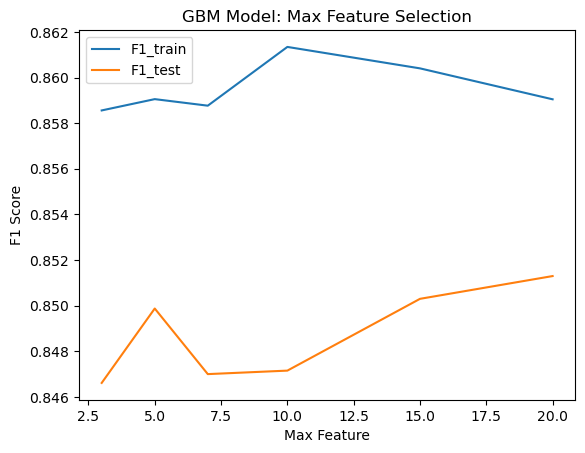

In [3536]:
gbm_scores= pd.DataFrame(index = range(0, 4), columns=['Paremeter','F1_train'])
j = 0
k = [3,5,7,10,15,20]

for i in k:
    gbm =  GradientBoostingClassifier( n_estimators = 1000,
                                      max_features = i ,
                                      max_depth = 5,
                                      learning_rate =0.01,
                                      random_state = 1234,
                                      verbose = 0)

    gbm_model_selection = cross_val_score(gbm,
                                          X_train_rev,
                                          y_train,
                                          cv = 10,
                                          n_jobs = multiprocessing.cpu_count() - 1,
                                          scoring = 'f1')
    
    gbm_scores.loc[j,"F1_train"] = gbm_model_selection.mean()
    gbm_scores.loc[j,"Parameter"] = i
    gbm_scores.loc[j,"F1_test"] = f1_score(y_test,gbm.fit(X_train_rev,y_train).predict(X_test_rev))
    
    j = j+1
    
plt.plot(gbm_scores.Parameter,gbm_scores.F1_train, label = "F1_train")
plt.plot(gbm_scores.Parameter,gbm_scores.F1_test, label = "F1_test")
plt.xlabel("Max Feature")
plt.ylabel("F1 Score")
plt.title("GBM Model: Max Feature Selection")
plt.legend()

As the number of variables increases, the model begins to overfit. A maximum number of 5 variables will be selected

### Max depth selection

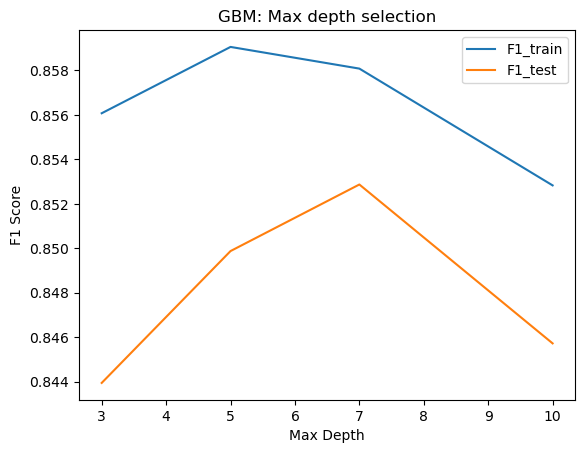

In [3534]:
gbm_scores= pd.DataFrame(index = range(0, 4), columns=['Paremeter','F1_train'])
j = 0
k = [3,5,7,10]

for i in k:
    gbm =  GradientBoostingClassifier( n_estimators = 1000,
        max_features= 5 ,
        max_depth=i,
        learning_rate=0.01,
        random_state = 1234,
        verbose = 0)

    gbm_model_selection = cross_val_score(gbm,
                                             X_train_rev,
                                             y_train,
                                             cv = 10,
                                             n_jobs = multiprocessing.cpu_count() - 1,
                                             scoring = 'f1')
    
    gbm_scores.loc[j,"F1_train"] = gbm_model_selection.mean()
    gbm_scores.loc[j,"Parameter"] = i
    gbm_scores.loc[j,"F1_test"] = f1_score(y_test,gbm.fit(X_train_rev,y_train).predict(X_test_rev))
    
    j = j+1
    
plt.plot(gbm_scores.Parameter,gbm_scores.F1_train, label = "F1_train")
plt.plot(gbm_scores.Parameter,gbm_scores.F1_test, label = "F1_test")
plt.xlabel("Max Depth")
plt.ylabel("F1 Score")
plt.title("GBM: Max depth selection")
plt.legend()

The f1 metric improves in both sets until a depth equal to 7 is reached.

In this way we arrive at the best GBM model

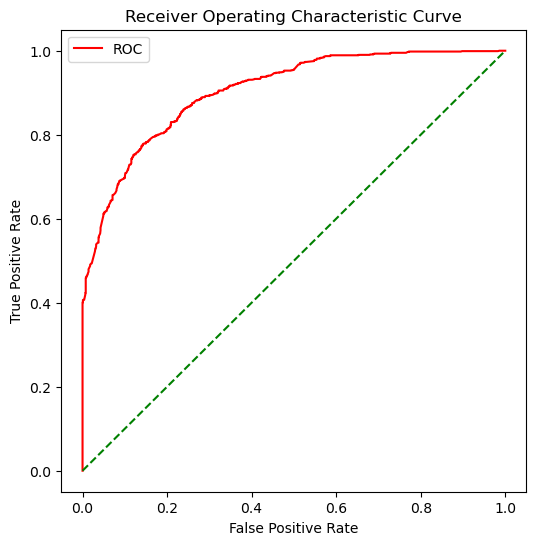

The AUC metric for the GBM Model is  86%
The f1 score for the train set is  94%
The f1 score for the test set is  85%


In [3535]:
gbm_model =  GradientBoostingClassifier(n_estimators = 1000,
        max_features= 5 ,
        max_depth=7,
        learning_rate=0.01,
        random_state = 1234,
        verbose = 0)

gbm_model.fit(X_train_rev, y_train)

plt.figure(figsize=(6,6))
prob = gbm_model.predict_proba(X_test)
prob = prob[:,1]
fper, tper, thresholds = roc_curve(y_test, prob)
plot_roc_curve(fper, tper)


print(f'The AUC metric for the GBM Model is {round(roc_auc_score(y_test,gbm_model.predict(X_test_rev)),3)*100: 0.0f}%')
print(f'The f1 score for the train set is {f1_score(y_train,gbm_model.predict(X_train_rev)).round(2)*100: 0.0f}%')
print(f'The f1 score for the test set is {f1_score(y_test,gbm_model.predict(X_test_rev)).round(2)*100: 0.0f}%')




The results obtained are very similar to the Random Forest model, but we can see a higher f1 metric in the training set, which implies that there is overfitting.

We can also see the most important variables for the prediction:

Text(0, 0.5, 'Feature')

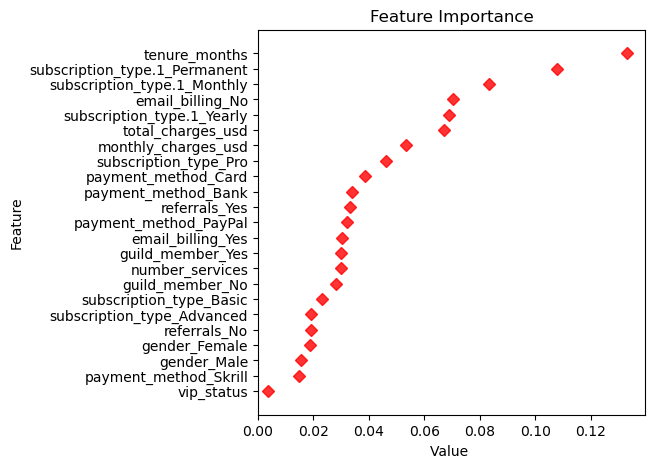

In [3217]:
gbm_FeatImp = pd.DataFrame({'feature' : X_train.columns,
             'importance' : gbm_model.feature_importances_}).sort_values(['importance'], ascending=True)

plt.figure(figsize = (5,5))
plt.barh(
    gbm_FeatImp['feature'],
    gbm_FeatImp['importance'],

    align='center',
    alpha=0
)
plt.plot(
    gbm_FeatImp['importance'],
    gbm_FeatImp['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)

plt.title('Feature Importance')
plt.xlabel("Value ")
plt.ylabel("Feature")

The GBM model shows us that the most important variables to predict player churn are the same as the Random Forest model, but considering tenure as the most important variable

# Conclusion

There is not a big difference in the metrics of the executed models. The Random Forest model and the Logistic Regression showed similar results with an f1_score around 85%. The GBM model also yielded similar results, but the difference between the score between the test set and the train set may indicate overfitting.

Regarding the key factors, the most important variables that predicted player churn were subscription type, seniority, email billing, and charges, according to the graphs made in the Random Forest and GBM models.

It doesn't tell us which ones increase the probability of player churn and which ones reduce it. But thanks to the analysis in the Linear Regression model we can understand that those players who have a permanent subscription, do not have email billing and who have more tenure have less probability of churn. We can also conclude that those players with higher charges are more likely to churn